In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


In [39]:
file_path = "/content/drive/MyDrive/Machine learning/Car_data.csv"
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [40]:
df.columns


Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

# Fill missing values if any
df2 = df2.fillna(df2.mode().iloc[0])

# Automatically encode every column that is text (object dtype)
for col in df2.columns:
    if df2[col].dtype == 'object':
      df2[col] = LabelEncoder().fit_transform(df2[col])

df2.head()


,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,15,393,1,144,38,6803,51,78,0,46,276,53,100.0,57040
1,80184,17,451,1,254,33,457,371,399,1,52,229,28,27782.0,69792
2,19864,2,51,7,142,36,8258,34,62,0,44,270,2,4247.0,23096
3,76699,16,417,9,197,33,3969,21,51,0,52,360,222,57000.0,13954
4,92991,22,516,1,57,38,6216,16,46,1,52,285,149,7500.0,9952


In [45]:
# Select features
X = df2[['year', 'mileage_in_km', 'power_kw', 'fuel_type', 'transmission_type', 'brand']]
y = df2['price_in_euro']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model Trained Successfully!")


✅ Model Trained Successfully!


In [46]:
print("R² Score:", model.score(X_test, y_test))


R² Score: 0.029650361697947658


In [47]:
df2[['fuel_type', 'transmission_type', 'brand']].head()


,fuel_type,transmission_type,brand
0,46,0,15
1,52,1,17
2,44,0,2
3,52,0,16
4,52,1,22


In [48]:
sample = [[2018, 45000, 85, 1, 0, 10]]  # change values as needed
predicted_price = model.predict(sample)
print("Predicted Selling Price (Euro):", predicted_price[0])


Predicted Selling Price (Euro): -164808.12445938034


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest R² Score:", rf.score(X_test, y_test))


Random Forest R² Score: 0.49921004892005716


In [50]:
rf.predict([[2018, 45000, 85, 1, 0, 10]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9754.84583333])

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=16,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

rf.fit(X_train, y_train)
print("Improved Random Forest R² Score:", rf.score(X_test, y_test))


Improved Random Forest R² Score: 0.53910336064193


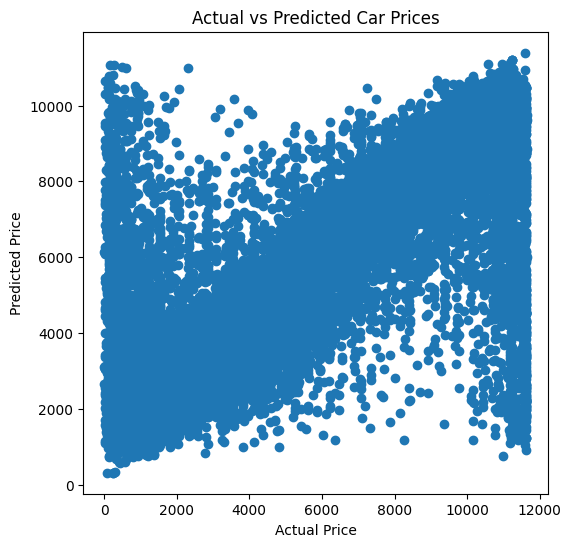

In [52]:
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()
